<a href="https://colab.research.google.com/github/U-11-Agar/time_series_bots-/blob/testing/trade%F0%9F%A4%96_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import time
import pandas as pd
import numpy as np

In [ ]:

BASE_URL = 'https://www.alphavantage.co/query?'
API_KEY = 'K37TOUDE2WB29LQJ'

In [58]:
def get_forex_ex(symbol):
   
    # API parameters
    params = {
        'function': 'CURRENCY_EXCHANGE_RATE',
        'from_currency': symbol[:3],
        'to_currency': symbol[3:],
        'apikey': API_KEY
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()
        # print(data)
        forex_ex = pd.DataFrame({
            # 'symbol': symbol,
            'exchange_rate': float(data['Realtime Currency Exchange Rate']['5. Exchange Rate']),
            'bid_price': float(data['Realtime Currency Exchange Rate']['8. Bid Price']),
            'ask_price': float(data['Realtime Currency Exchange Rate']['9. Ask Price'])
        },index=[pd.to_datetime(data['Realtime Currency Exchange Rate']['6. Last Refreshed'])])
        forex_ex.index.name='time'
        return forex_ex
    except Exception as e:
        print(f'Error fetching forex exchange details: {e}')
        return pd.DataFrame()




In [ ]:
from keras.models import Model
from keras.layers import LSTM, Dense, Bidirectional, LeakyReLU,Dropout,BatchNormalization,Attention,Input
from keras.losses import mean_squared_error
from keras.metrics import RootMeanSquaredError
from keras.initializers import RandomNormal
from keras.callbacks import Callback
from keras.optimizers import Adam

In [ ]:
def lstm_model(model,n_features):
  model.add(LSTM(units=400, return_sequences=True, input_shape=(n_features,), use_bias=True,activation='relu'))
  model.add(BatchNormalization())
  for _ in range(5):   
    model.add(LSTM(units=400, use_bias=True,return_sequences=True,activation='relu'))
    model.add(BatchNormalization())
  model.add(LSTM(units=400, return_sequences=False, use_bias=True,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=1, activation='linear'))
  model.compile(optimizer='adam', loss=mean_squared_error, metrics=[RootMeanSquaredError()])
  return model

In [62]:
# Example usage
symbol = 'BTCINR'  # Example forex exchange symbol

# Create an empty DataFrame
df = pd.DataFrame(columns=['exchange_rate','bid_price','ask_price'],index=['time'])
model = Sequential()
n_features=df.shape[1]
model=lstm_model(model,n_features)



while True:
    forex_ex = get_forex_ex(symbol)
    features=
    if (not forex_ex.empty):
      # Append fetched data to DataFrame
      # df = df.append(forex_ex, ignore_index=True)
      df = pd.concat([df,forex_ex],axis=0, ignore_index=False)
      # df.index=pd.to_datetime(df['timestamp'])
      # df=df.reindex(df['timestamp'])
      print(df)
      time.sleep(55)  # Sleep for 15 seconds
    else:
      time.sleep(30)

                     symbol  exchange_rate     bid_price     ask_price
time                    NaN            NaN           NaN           NaN
2023-05-20 21:37:40  BTCINR   2.242198e+06  2.242198e+06  2.242199e+06
                     symbol  exchange_rate     bid_price     ask_price
time                    NaN            NaN           NaN           NaN
2023-05-20 21:37:40  BTCINR   2.242198e+06  2.242198e+06  2.242199e+06
2023-05-20 21:38:37  BTCINR   2.242198e+06  2.242198e+06  2.242199e+06
                     symbol  exchange_rate     bid_price     ask_price
time                    NaN            NaN           NaN           NaN
2023-05-20 21:37:40  BTCINR   2.242198e+06  2.242198e+06  2.242199e+06
2023-05-20 21:38:37  BTCINR   2.242198e+06  2.242198e+06  2.242199e+06
2023-05-20 21:39:34  BTCINR   2.242198e+06  2.242198e+06  2.242199e+06
                     symbol  exchange_rate     bid_price     ask_price
time                    NaN            NaN           NaN           NaN
2023-0

KeyboardInterrupt: ignored

In [ ]:
df.info()

In [ ]:
def split_sequence(seq1, seq2, n_steps):
    X = []
    y = []
    
    for i in range(len(seq1)):
        lastIndex = i + n_steps
        if lastIndex > len(seq1) - 1:
            break
        
        seq_X, seq_y = seq1[i:lastIndex], seq2[lastIndex]
        
        X.append(seq_X)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)
    
    return X, y

In [6]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

BASE_URL = 'https://www.alphavantage.co/query?'
API_KEY = 'K37TOUDE2WB29LQJ'
SYMBOL = 'BTCINR'  # Example forex exchange symbol
BATCH_SIZE = 32
NUM_FEATURES = 3
TIME_DELAY = 45  # Time delay in seconds

def get_forex_exchange(symbol):
    params = {
        'function': 'CURRENCY_EXCHANGE_RATE',
        'from_currency': symbol[:3],
        'to_currency': symbol[3:],
        'apikey': API_KEY
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        forex_exchange = pd.DataFrame({
            'exchange_rate': float(data['Realtime Currency Exchange Rate']['5. Exchange Rate']),
            'bid_price': float(data['Realtime Currency Exchange Rate']['8. Bid Price']),
            'ask_price': float(data['Realtime Currency Exchange Rate']['9. Ask Price'])
        }, index=[pd.to_datetime(data['Realtime Currency Exchange Rate']['6. Last Refreshed'])])
        forex_exchange.index.name = 'time'

        return forex_exchange
    except Exception as e:
        print(f'Error fetching forex exchange details: {e}')
        return pd.DataFrame()

def create_lstm_model(num_features):
    model = Sequential()
    model.add(LSTM(units=400, return_sequences=True, input_shape=(None, num_features), use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    for _ in range(5):
        model.add(LSTM(units=400, return_sequences=True, use_bias=True, activation='relu'))
        model.add(BatchNormalization())
    model.add(LSTM(units=400, return_sequences=False, use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation='linear'))

    optimizer = Adam()
    model.compile(optimizer=optimizer, loss=mean_squared_error, metrics=[RootMeanSquaredError()])

    return model

# Create an empty DataFrame
df = pd.DataFrame(columns=['exchange_rate', 'bid_price', 'ask_price'])

model = create_lstm_model(NUM_FEATURES)

predictions_df = pd.DataFrame(columns=['time', 'real_value', 'predicted_value'])

while True:
    forex_exchange = get_forex_exchange(SYMBOL)
    if not forex_exchange.empty:
        # df = df.append(forex_exchange)
        df = pd.concat([df,forex_exchange],axis=0, ignore_index=False)
        df.dropna(inplace=True,axis=0)
        print(df)
        num_samples = df.shape[0]
        if num_samples >= BATCH_SIZE:
            start_index = num_samples - BATCH_SIZE
            end_index = num_samples
            features = np.array(df.iloc[start_index:end_index])
            labels = np.array(df['exchange_rate'].iloc[start_index:end_index])

            features = np.expand_dims(features, axis=0)  # Add batch dimension

            model.train_on_batch(features, labels)

            # Make predictions
            predictions = model.predict(features)[0]

            # Store predictions in DataFrame
            new_predictions = pd.DataFrame({
                'time': df.index[end_index-1],
                'real_value': labels[-1],
                'predicted_value': predictions[-1]
            }, index=[df.index[end_index-1]])

            predictions_df = predictions_df.append(new_predictions)

            # Plot the graph
            plt.figure(figsize=(10, 6))
            plt.plot(predictions_df['time'], predictions_df['real_value'], label='Real Value')
            plt.plot(predictions_df['time'], predictions_df['predicted_value'], label='Predicted Value')
            plt.xlabel('Time')
            plt.ylabel('Exchange Rate')
            plt.title('Real vs Predicted Exchange Rate')
            plt.legend()
            plt.show()

    time.sleep(TIME_DELAY)


                     exchange_rate     bid_price     ask_price
2023-05-24 15:31:14   2.178514e+06  2.178514e+06  2.178515e+06
                     exchange_rate     bid_price     ask_price
2023-05-24 15:31:14   2.178514e+06  2.178514e+06  2.178515e+06
2023-05-24 15:32:20   2.179202e+06  2.179201e+06  2.179202e+06
                     exchange_rate     bid_price     ask_price
2023-05-24 15:31:14   2.178514e+06  2.178514e+06  2.178515e+06
2023-05-24 15:32:20   2.179202e+06  2.179201e+06  2.179202e+06
2023-05-24 15:33:07   2.179039e+06  2.179039e+06  2.179040e+06
                     exchange_rate     bid_price     ask_price
2023-05-24 15:31:14   2.178514e+06  2.178514e+06  2.178515e+06
2023-05-24 15:32:20   2.179202e+06  2.179201e+06  2.179202e+06
2023-05-24 15:33:07   2.179039e+06  2.179039e+06  2.179040e+06
2023-05-24 15:33:07   2.179039e+06  2.179039e+06  2.179040e+06
                     exchange_rate     bid_price     ask_price
2023-05-24 15:31:14   2.178514e+06  2.178514e+06  2.178

KeyboardInterrupt: ignored

In [64]:
def splitSequence(seq1,sq2, n_steps,n_features):
    
    #Declare X and y as empty list
    X = []
    y = []
    for i in np.arange(n_steps, len(seq1)):
        X.append(seq1[i-n_steps:i, :])
        y.append(seq2[i])
    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], n_steps, n_features)
    return X, y


In [63]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

BASE_URL = 'https://www.alphavantage.co/query?'
API_KEY = 'Z4XUKBG497A1K6U8'
SYMBOL = 'BTCINR'  # Example forex exchange symbol
BATCH_SIZE = 3
# NUM_FEATURES = 3
n_features=3
n_steps=3
TIME_DELAY = 30  # Time delay in seconds

def get_forex_exchange(symbol):
    params = {
        'function': 'CURRENCY_EXCHANGE_RATE',
        'from_currency': symbol[:3],
        'to_currency': symbol[3:],
        'apikey': API_KEY
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        forex_exchange = pd.DataFrame({
            'exchange_rate': float(data['Realtime Currency Exchange Rate']['5. Exchange Rate']),
            'bid_price': float(data['Realtime Currency Exchange Rate']['8. Bid Price']),
            'ask_price': float(data['Realtime Currency Exchange Rate']['9. Ask Price'])
        }, index=[pd.to_datetime(data['Realtime Currency Exchange Rate']['6. Last Refreshed'])])
        forex_exchange.index.name = 'time'

        return forex_exchange
    except Exception as e:
        print(f'Error fetching forex exchange details: {e}')
        return pd.DataFrame()

def create_lstm_model(n_steps,n_features):
    model = Sequential()
    model.add(LSTM(units=400, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    for _ in range(5):
        model.add(LSTM(units=400, return_sequences=True, use_bias=True, activation='relu'))
        model.add(BatchNormalization())
    model.add(LSTM(units=400, return_sequences=False, use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation='linear'))

    optimizer = Adam(0.01)
    model.compile(optimizer=optimizer, loss=mean_squared_error, metrics=[RootMeanSquaredError()])
    model.summary()
    return model


In [66]:


# Create an empty DataFrame
df = pd.DataFrame(columns=['exchange_rate', 'bid_price', 'ask_price'])

model = create_lstm_model(n_steps,n_features)

predictions_df = pd.DataFrame(columns=['time', 'real_value', 'predicted_value'])

while True:
    forex_exchange = get_forex_exchange(SYMBOL)
    if not forex_exchange.empty:
        df = pd.concat([df, forex_exchange]).drop_duplicates()
        num_samples = df.shape[0]
    if num_samples > BATCH_SIZE:
        start_index = num_samples - BATCH_SIZE
        end_index = num_samples
        features = np.array(df[['exchange_rate', 'bid_price', 'ask_price']].iloc[start_index:end_index]).astype(float)
        labels = np.array(df['exchange_rate'].iloc[start_index+1:end_index+1]).astype(float)

        # X,y=splitSequence(features,labels,n_steps,n_features)
        # X = X.reshape((X.shape[0], X.shape[1], n_features))

        features = np.expand_dims(features, axis=0)  # Add batch dimension
        labels=labels.reshape(1,-1)
         # (1, 3, 4)

        # y = np.array([1,0,1])
        # y = y.reshape(1,-1)
        # print('Shape of X is ', features.shape)
        # print('Shape of y is', labels.shape) # (1, 3)

        # model.train_on_batch(X, y)

        # Make predictions
        predictions = model.predict(features)

        # print(predictions)



        new_predictions = pd.DataFrame({
            'time': df.index[end_index],
            'real_value': labels[0][-1],
            'predicted_value': predictions[-1]
        }, index=[df.index[end_index]])

        predictions_df = pd.concat([predictions_df, new_predictions])

        if num_samples % BATCH_SIZE == 0:
            plt.figure(figsize=(10, 6))
            plt.plot(predictions_df['time'], predictions_df['real_value'], label='Real Value')
            plt.plot(predictions_df['time'], predictions_df['predicted_value'], label='Predicted Value')
            plt.xlabel('Time')
            plt.ylabel('Exchange Rate')
            plt.title('Real vs Predicted Exchange Rate')
            plt.legend()
            plt.show()

        time.sleep(TIME_DELAY)
    else:
        time.sleep(30)

# 

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_126 (LSTM)             (None, 3, 400)            646400    
                                                                 
 batch_normalization_126 (Ba  (None, 3, 400)           1600      
 tchNormalization)                                               
                                                                 
 lstm_127 (LSTM)             (None, 3, 400)            1281600   
                                                                 
 batch_normalization_127 (Ba  (None, 3, 400)           1600      
 tchNormalization)                                               
                                                                 
 lstm_128 (LSTM)             (None, 3, 400)            1281600   
                                                                 
 batch_normalization_128 (Ba  (None, 3, 400)         

NameError: ignored

In [60]:
df.iloc[0:3]

,exchange_rate,bid_price,ask_price
2023-05-24 19:17:13,2.170613e+06,2.170613e+06,2.170614e+06
2023-05-24 19:18:15,2.170555e+06,2.170554e+06,2.170555e+06
2023-05-24 19:19:17,2.174736e+06,2.174736e+06,2.174737e+06


In [61]:
df[1:4]

,exchange_rate,bid_price,ask_price
2023-05-24 19:18:15,2.170555e+06,2.170554e+06,2.170555e+06
2023-05-24 19:19:17,2.174736e+06,2.174736e+06,2.174737e+06
2023-05-24 19:20:12,2.176117e+06,2.176117e+06,2.176118e+06


In [39]:
predictions

array([[-4.9163704]], dtype=float32)

In [57]:
features

array([[[2176116.82160746, 2176116.82160746, 2176117.64858243],
        [2178437.31337328, 2178436.48639831, 2178437.31337328],
        [2177726.11489908, 2177725.28792411, 2177726.11489908]]])

In [56]:
labels

array([[2176116.82160746, 2178437.31337328, 2177726.11489908]])

In [46]:
labels = np.array(df['exchange_rate'].iloc[start_index:end_index]).astype(float)

In [52]:
labels=labels.reshape(1,-1)
labels[][-1]

IndexError: ignored

In [53]:
df.index[end_index-1]

Timestamp('2023-05-24 18:54:20')

In [49]:
 new_predictions = pd.DataFrame({
            'real_value': labels[-1],
            'predicted_value': predictions[-1]
        }, index=[pd.to_datetime(df.index[-1])])

In [30]:
predictions[-1]

34.751408

In [ ]:
features.shape

In [8]:
np.array(df[['exchange_rate', 'bid_price', 'ask_price']].iloc[start_index:end_index])

array([[2164397.75930759, 2164397.75930759, 2164398.58628256],
       [2164276.193987  , 2164276.193987  , 2164277.02096197]])

In [ ]:
df.info()

In [69]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

BASE_URL = 'https://www.alphavantage.co/query?'
API_KEY = 'Z4XUKBG497A1K6U8'
SYMBOL = 'BTCINR'  # Example forex exchange symbol
BATCH_SIZE = 3
# NUM_FEATURES = 3
n_features = 3
n_steps = 3
TIME_DELAY = 30  # Time delay in seconds


def get_forex_exchange(symbol):
    params = {
        'function': 'CURRENCY_EXCHANGE_RATE',
        'from_currency': symbol[:3],
        'to_currency': symbol[3:],
        'apikey': API_KEY
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        forex_exchange = pd.DataFrame({
            'exchange_rate': float(data['Realtime Currency Exchange Rate']['5. Exchange Rate']),
            'bid_price': float(data['Realtime Currency Exchange Rate']['8. Bid Price']),
            'ask_price': float(data['Realtime Currency Exchange Rate']['9. Ask Price'])
        }, index=[pd.to_datetime(data['Realtime Currency Exchange Rate']['6. Last Refreshed'])])
        forex_exchange.index.name = 'time'

        return forex_exchange
    except Exception as e:
        print(f'Error fetching forex exchange details: {e}')
        return pd.DataFrame()


def create_lstm_model(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(units=400, return_sequences=True, input_shape=(
        n_steps, n_features), use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    for _ in range(5):
        model.add(LSTM(units=400, return_sequences=True,
                  use_bias=True, activation='relu'))
        model.add(BatchNormalization())
    model.add(LSTM(units=400, return_sequences=False,
              use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation='linear'))

    optimizer = Adam(0.01)
    model.compile(optimizer=optimizer, loss=mean_squared_error,
                  metrics=[RootMeanSquaredError()])
    model.summary()
    return model


def splitSequence(seq1, sq2, n_steps, n_features):

    # Declare X and y as empty list
    X = []
    y = []
    for i in np.arange(n_steps, len(seq1)):
        X.append(seq1[i-n_steps:i, :])
        y.append(seq2[i])
    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], n_steps, n_features)
    return X, y

# from re import X


# Create an empty DataFrame
df = pd.DataFrame(columns=['exchange_rate', 'bid_price', 'ask_price'])

model = create_lstm_model(n_steps, n_features)

predictions_df = pd.DataFrame(
    columns=['time', 'real_value', 'predicted_value'])

while True:
    forex_exchange = get_forex_exchange(SYMBOL)
    if not forex_exchange.empty:
        df = pd.concat([df, forex_exchange]).drop_duplicates()
        num_samples = df.shape[0]
    if num_samples > BATCH_SIZE:
        start_index = num_samples - BATCH_SIZE
        end_index = num_samples
        features = np.array(df[['exchange_rate', 'bid_price', 'ask_price']
                               ].iloc[start_index:end_index]).astype(float)
        labels = np.array(
            df['exchange_rate'].iloc[start_index+1:end_index+1]).astype(float)

        X, y = splitSequence(features, labels, n_steps, n_features)
        

        model.train_on_batch(X, y)

        # Make predictions
        predictions = model.predict(X)

        # print(predictions)

        new_predictions = pd.DataFrame({
            'time': df.index[end_index-1],
            'real_value': labels[0][-1],
            'predicted_value': predictions[-1]
        }, index=[df.index[end_index-1]])

        predictions_df = pd.concat([predictions_df, new_predictions])

        if num_samples % BATCH_SIZE == 0:
            plt.figure(figsize=(10, 6))
            plt.plot(
                predictions_df['time'], predictions_df['real_value'], label='Real Value')
            plt.plot(
                predictions_df['time'], predictions_df['predicted_value'], label='Predicted Value')
            plt.xlabel('Time')
            plt.ylabel('Exchange Rate')
            plt.title('Real vs Predicted Exchange Rate')
            plt.legend()
            plt.show()

        time.sleep(TIME_DELAY)
    else:
        time.sleep(30)

#


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_147 (LSTM)             (None, 3, 400)            646400    
                                                                 
 batch_normalization_147 (Ba  (None, 3, 400)           1600      
 tchNormalization)                                               
                                                                 
 lstm_148 (LSTM)             (None, 3, 400)            1281600   
                                                                 
 batch_normalization_148 (Ba  (None, 3, 400)           1600      
 tchNormalization)                                               
                                                                 
 lstm_149 (LSTM)             (None, 3, 400)            1281600   
                                                                 
 batch_normalization_149 (Ba  (None, 3, 400)         

ValueError: ignored

In [83]:

import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

BASE_URL = 'https://www.alphavantage.co/query?'
API_KEY = 'Z4XUKBG497A1K6U8'
SYMBOL = 'BTCINR'  # Example forex exchange symbol
BATCH_SIZE = 32
# NUM_FEATURES = 3
n_features=3
n_steps=10
TIME_DELAY = 30  # Time delay in seconds

def get_forex_exchange(symbol):
    params = {
        'function': 'CURRENCY_EXCHANGE_RATE',
        'from_currency': symbol[:3],
        'to_currency': symbol[3:],
        'apikey': API_KEY
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        forex_exchange = pd.DataFrame({
            'exchange_rate': float(data['Realtime Currency Exchange Rate']['5. Exchange Rate']),
            'bid_price': float(data['Realtime Currency Exchange Rate']['8. Bid Price']),
            'ask_price': float(data['Realtime Currency Exchange Rate']['9. Ask Price'])
        }, index=[pd.to_datetime(data['Realtime Currency Exchange Rate']['6. Last Refreshed'])])
        forex_exchange.index.name = 'time'

        return forex_exchange
    except Exception as e:
        print(f'Error fetching forex exchange details: {e}')
        return pd.DataFrame()

def create_lstm_model(n_features):
    model = Sequential()
    model.add(LSTM(units=400, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    for _ in range(5):
        model.add(LSTM(units=400, return_sequences=True, use_bias=True, activation='relu'))
        model.add(BatchNormalization())
    model.add(LSTM(units=400, return_sequences=False, use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation='linear'))

    optimizer = Adam(0.01)
    model.compile(optimizer=optimizer, loss=mean_squared_error, metrics=[RootMeanSquaredError()])
    model.summary()
    return model

# Create an empty DataFrame
df = pd.DataFrame(columns=['exchange_rate', 'bid_price', 'ask_price'])

model = create_lstm_model(n_features)

predictions_df = pd.DataFrame(columns=['time', 'real_value', 'predicted_value'])

while True:
    forex_exchange = get_forex_exchange(SYMBOL)
    if not forex_exchange.empty:
        df = pd.concat([df, forex_exchange]).drop_duplicates()
        num_samples = df.shape[0]
    if num_samples > BATCH_SIZE:
        start_index = num_samples - BATCH_SIZE-1
        end_index = num_samples-1
        features = np.array(df[['exchange_rate', 'bid_price', 'ask_price']].iloc[start_index:end_index]).astype(float)
        labels = np.array(df['exchange_rate'].iloc[start_index+1:end_index+1]).astype(float)

        # X,y=splitSequence(features,labels,n_steps,n_features)
        # X = X.reshape((X.shape[0], X.shape[1], n_features))

        features = np.expand_dims(features, axis=0)  # Add batch dimension
        # labels=labels.reshape(1,-1)
         # (1, 3, 4)
        features = features.reshape((1, n_steps, n_features))
        labels = labels.reshape((1, n_steps, 1))


        # y = np.array([1,0,1])
        # y = y.reshape(1,-1)
        # print('Shape of X is ', features.shape)
        # print('Shape of y is', labels.shape) # (1, 3)

        # model.train_on_batch(X, y)

        # Make predictions
        # Make predictions
        predictions = model.predict(features)
        # predictions = predictions.reshape((n_steps, 1))

        new_predictions = pd.DataFrame({
            # 'time': df.index[end_index-n_steps+1:end_index+1],
            'real_value': labels[0, -1, 0],
            'predicted_value': predictions[-1]
        },index=[pd.to_datetime(df.index[end_index])])

        predictions_df = pd.concat([predictions_df, new_predictions])

        if num_samples % BATCH_SIZE == 0:
            plt.figure(figsize=(10, 6))
            plt.plot(predictions_df['time'], predictions_df['real_value'], label='Real Value')
            plt.plot(predictions_df['time'], predictions_df['predicted_value'], label='Predicted Value')
            plt.xlabel('Time')
            plt.ylabel('Exchange Rate')
            plt.title('Real vs Predicted Exchange Rate')
            plt.legend()
            plt.show()


        time.sleep(TIME_DELAY)
    else:
        time.sleep(30)

# 

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_196 (LSTM)             (None, 10, 400)           646400    
                                                                 
 batch_normalization_196 (Ba  (None, 10, 400)          1600      
 tchNormalization)                                               
                                                                 
 lstm_197 (LSTM)             (None, 10, 400)           1281600   
                                                                 
 batch_normalization_197 (Ba  (None, 10, 400)          1600      
 tchNormalization)                                               
                                                                 
 lstm_198 (LSTM)             (None, 10, 400)           1281600   
                                                                 
 batch_normalization_198 (Ba  (None, 10, 400)        

ValueError: ignored

In [75]:
labels

array([[[2181785.73502681],
        [2181787.38897675],
        [2181786.56200178]]])

In [77]:
labels[0, -1, 0]

2181786.56200178

In [78]:
new_predictions = pd.DataFrame({
            # 'time': df.index[end_index-n_steps+1:end_index+1],
            'real_value': labels[0, -1, 0],
            'predicted_value': predictions[-1]
        },index=[pd.to_datetime(df.index[end_index])])

IndexError: ignored

In [81]:
df.index

DatetimeIndex(['2023-05-24 22:18:47'], dtype='datetime64[ns]', freq=None)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 10, 400)           646400    
                                                                 
 batch_normalization_7 (Batc  (None, 10, 400)          1600      
 hNormalization)                                                 
                                                                 
 lstm_8 (LSTM)               (None, 10, 400)           1281600   
                                                                 
 batch_normalization_8 (Batc  (None, 10, 400)          1600      
 hNormalization)                                                 
                                                                 
 lstm_9 (LSTM)               (None, 10, 400)           1281600   
                                                                 
 batch_normalization_9 (Batc  (None, 10, 400)         

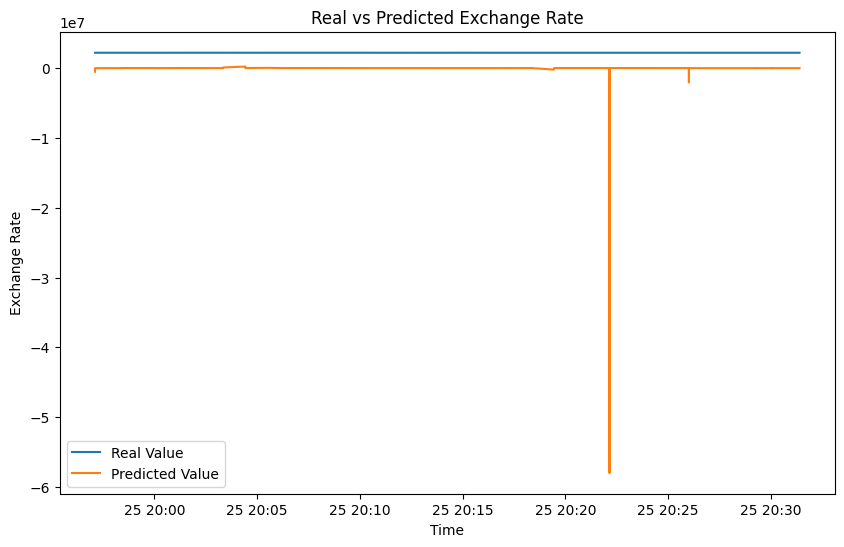

1/1 [==============================] - 0s 233ms/step


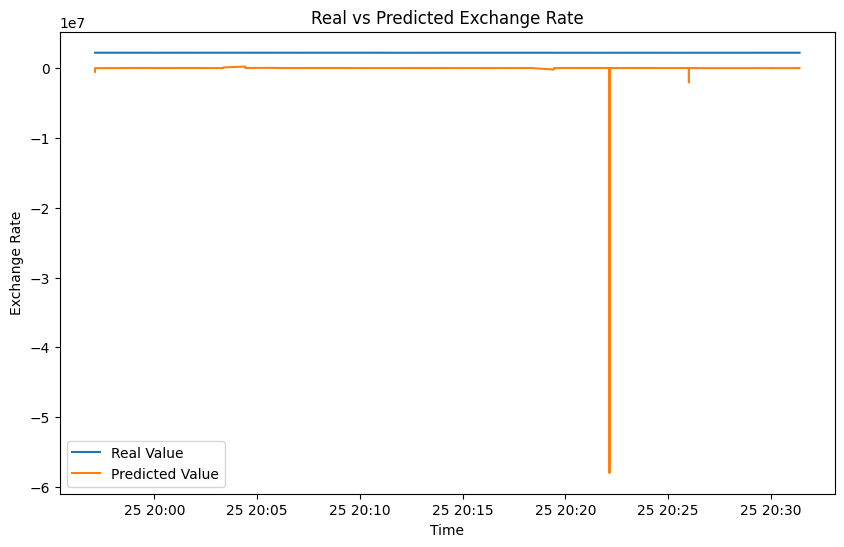

1/1 [==============================] - 0s 133ms/step
Error fetching forex exchange details: could not convert string to float: '-'
1/1 [==============================] - 0s 132ms/step


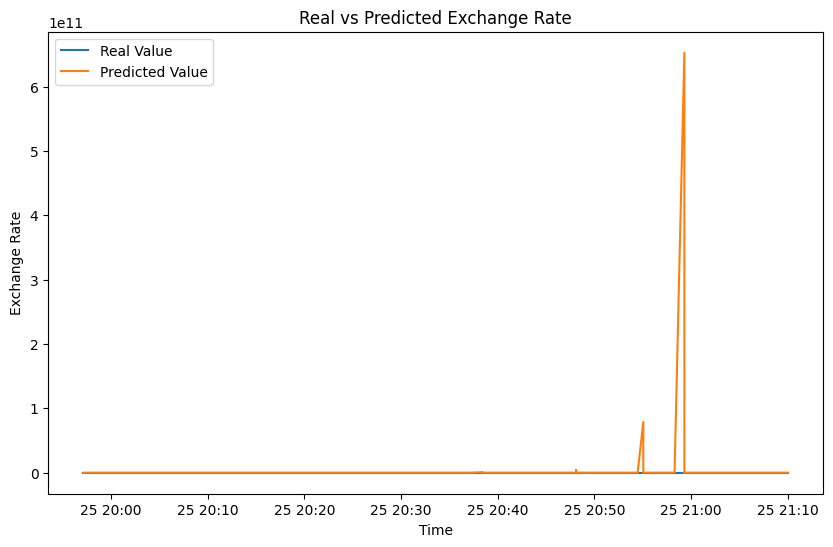

1/1 [==============================] - 0s 134ms/step


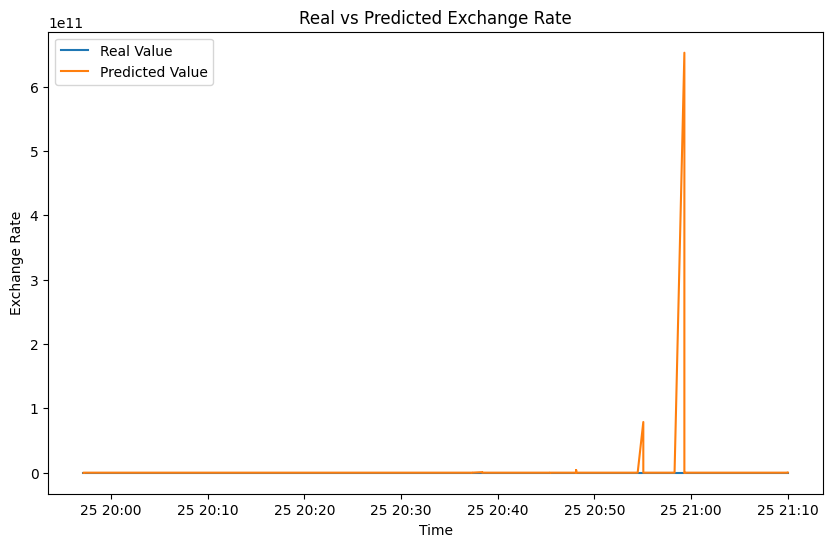

1/1 [==============================] - 0s 141ms/step


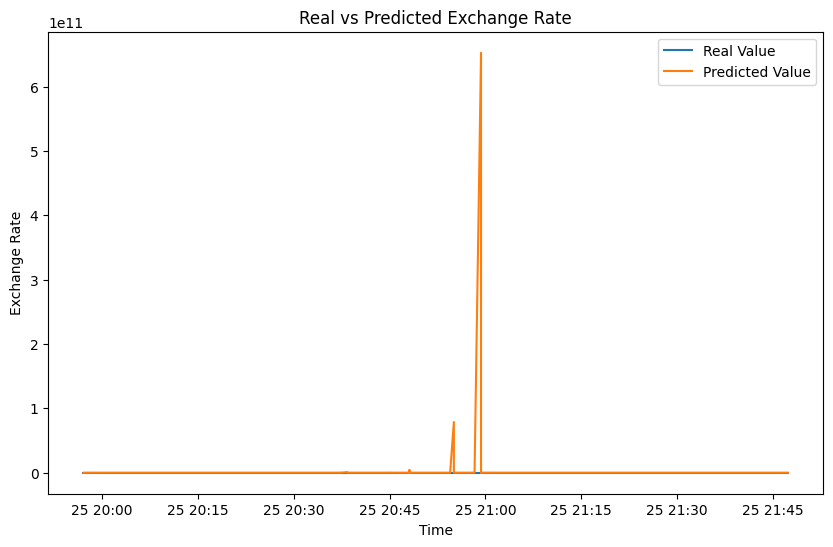

1/1 [==============================] - 0s 227ms/step


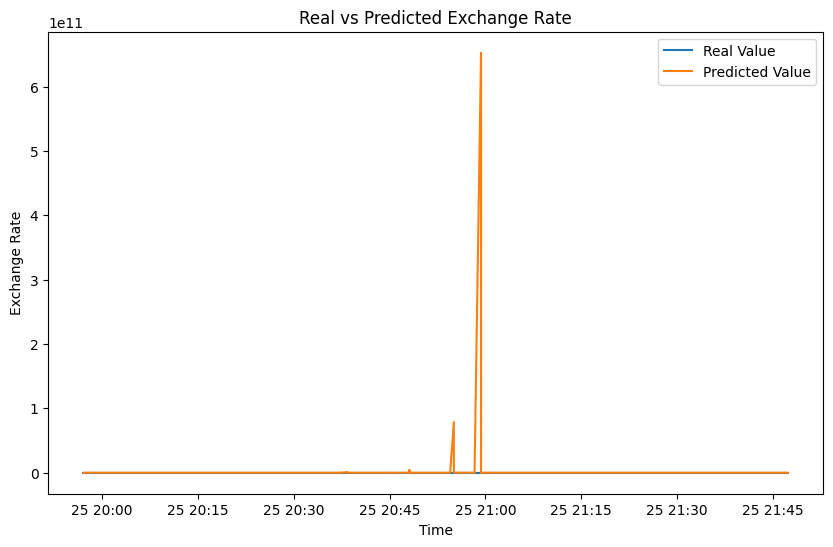

1/1 [==============================] - 0s 129ms/step


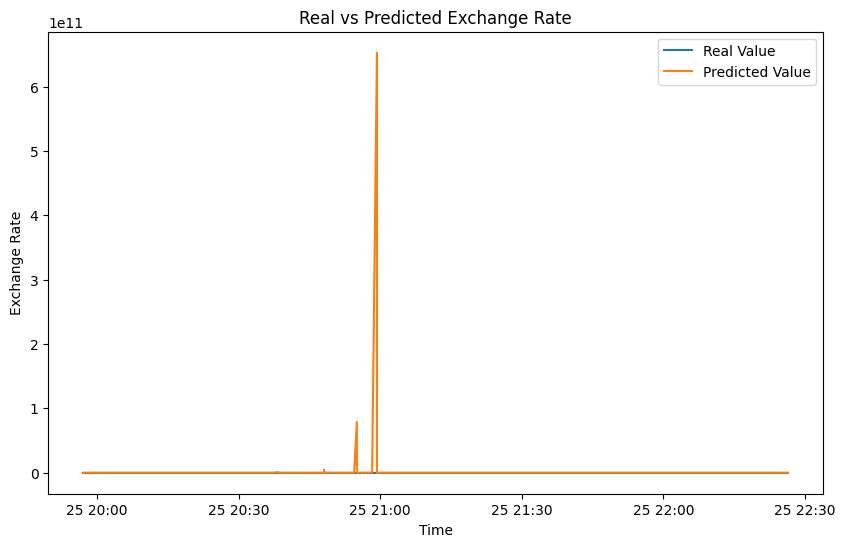

1/1 [==============================] - 0s 134ms/step


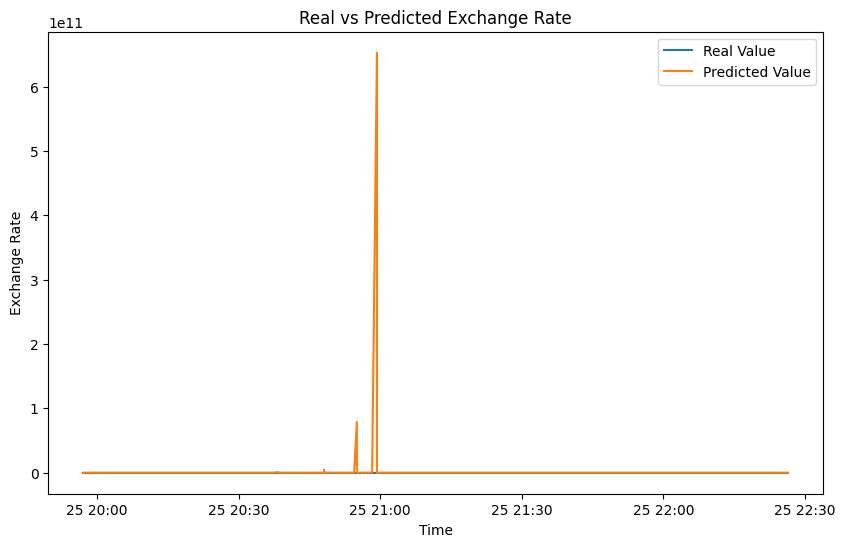

1/1 [==============================] - 0s 150ms/step


KeyboardInterrupt: ignored

In [2]:

import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

BASE_URL = 'https://www.alphavantage.co/query?'
API_KEY = 'Z4XUKBG497A1K6U8'
SYMBOL = 'BTCINR'  # Example forex exchange symbol
BATCH_SIZE = 32
epoch=2
# NUM_FEATURES = 3
n_features=3
n_steps=10
TIME_DELAY = 30  # Time delay in seconds

def get_forex_exchange(symbol):
    params = {
        'function': 'CURRENCY_EXCHANGE_RATE',
        'from_currency': symbol[:3],
        'to_currency': symbol[3:],
        'apikey': API_KEY
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        forex_exchange = pd.DataFrame({
            'exchange_rate': float(data['Realtime Currency Exchange Rate']['5. Exchange Rate']),
            'bid_price': float(data['Realtime Currency Exchange Rate']['8. Bid Price']),
            'ask_price': float(data['Realtime Currency Exchange Rate']['9. Ask Price'])
        }, index=[pd.to_datetime(data['Realtime Currency Exchange Rate']['6. Last Refreshed'])])
        forex_exchange.index.name = 'time'

        return forex_exchange
    except Exception as e:
        print(f'Error fetching forex exchange details: {e}')
        return pd.DataFrame()

def create_lstm_model(n_steps,n_features):
    model = Sequential()
    model.add(LSTM(units=400, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True, activation='linear'))
    model.add(BatchNormalization())
    for _ in range(5):
        model.add(LSTM(units=400, return_sequences=True, use_bias=True, activation='relu'))
        model.add(BatchNormalization())
    model.add(LSTM(units=400, return_sequences=False, use_bias=True, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation='linear'))

    optimizer = Adam(0.01)
    model.compile(optimizer=optimizer, loss=mean_squared_error, metrics=[RootMeanSquaredError()])
    model.summary()
    return model

def splitsequence(data, n_steps, n_features):

    # Declare X and y as empty list
    X = []
    y = []
    for i in np.arange(n_steps, len(data)):
        X.append(data.iloc[i-n_steps:i, :])
        y.append(data['exchange_rate'][i])
    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], n_steps, n_features)
    return X, y

# Create an empty DataFrame
df = pd.DataFrame(columns=['exchange_rate', 'bid_price', 'ask_price'])

model = create_lstm_model(n_steps,n_features)

predictions_df = pd.DataFrame(columns=['time', 'real_value', 'predicted_value'])

while True:
    forex_exchange = get_forex_exchange(SYMBOL)
    if not forex_exchange.empty:
        df = pd.concat([df, forex_exchange]).drop_duplicates()
        num_samples = df.shape[0]
    if num_samples > BATCH_SIZE:
        start_index = num_samples - BATCH_SIZE
        end_index = num_samples
       
        features,labels= splitsequence(df.iloc[start_index-1:,:],n_steps,n_features)
      
        for _ in range(epoch):
          model.train_on_batch(features, labels)

       
        predictions = model.predict(features)
        # predictions = predictions.reshape((n_steps, 1))

        new_predictions = pd.DataFrame({
            # 'time': df.index[end_index-n_steps+1:end_index+1],
            'real_value': df['exchange_rate'][end_index-1],
            'predicted_value': predictions[-1]
        },index=[pd.to_datetime(df.index[end_index-1])])

        predictions_df = pd.concat([predictions_df, new_predictions])

        if num_samples % BATCH_SIZE == 0:
            plt.figure(figsize=(10, 6))
            plt.plot(predictions_df.index, predictions_df['real_value'], label='Real Value')
            plt.plot(predictions_df.index, predictions_df['predicted_value'], label='Predicted Value')
            plt.xlabel('Time')
            plt.ylabel('Exchange Rate')
            plt.title('Real vs Predicted Exchange Rate')
            plt.legend()
            plt.show()


        time.sleep(TIME_DELAY)
    else:
        time.sleep(30)

# 

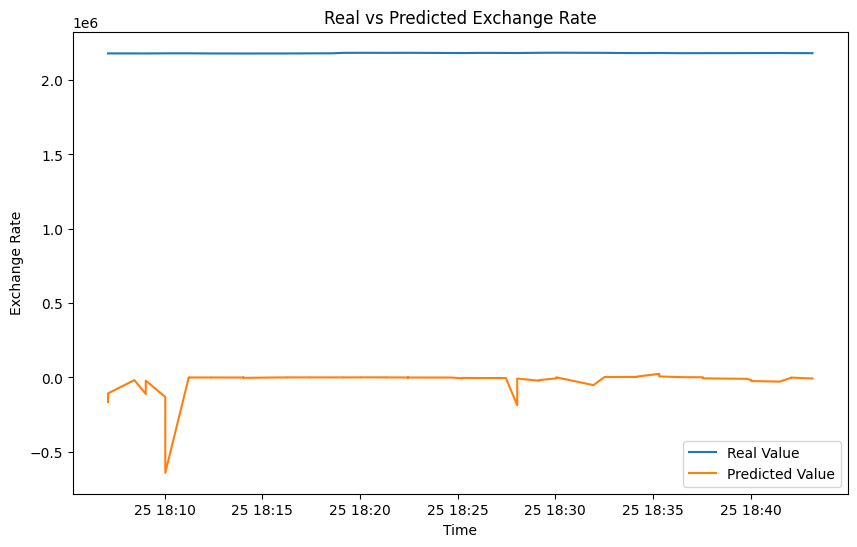

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(predictions_df.index, predictions_df['real_value'], label='Real Value')
plt.plot(predictions_df.index, predictions_df['predicted_value'], label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.title('Real vs Predicted Exchange Rate')
plt.legend()
plt.show()

In [22]:
import numpy as np
import pandas as pd
data = pd.DataFrame({
    'Column1': np.random.randint(1, 100, 50),
    'Column2': np.random.rand(50),
    'Column3': np.random.choice(['A', 'B', 'C'], size=50)
})

# df = pd.DataFrame(data)

# Print the dataframe
data

,Column1,Column2,Column3
0,23,0.103737,A
1,89,0.274006,B
2,63,0.843623,A
3,62,0.792457,B
4,90,0.276081,C
5,24,0.639832,C
6,41,0.997845,C
7,8,0.212463,B
8,95,0.924274,C
9,72,0.201871,A


In [25]:
y[-1]

96

In [18]:
data.shape[0]

50

In [20]:
data['Column1'][49]

96

In [10]:
def splitsequence(data, n_steps, n_features):

    # Declare X and y as empty list
    X = []
    y = []
    for i in np.arange(n_steps, len(data)):
        X.append(data.iloc[i-n_steps:i, :])
        y.append(data['Column1'][i])
    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], n_steps, n_features)
    return X, y

In [11]:
x,y=splitsequence(data,10,3)

In [17]:
x[-1]

array([[78, 0.009409454515859728, 'B'],
       [1, 0.3387860654943363, 'A'],
       [60, 0.0893576653782383, 'C'],
       [30, 0.8023798836309438, 'A'],
       [36, 0.005639796832110022, 'C'],
       [56, 0.631456534488466, 'B'],
       [30, 0.11197638748498262, 'B'],
       [64, 0.8509939152985619, 'B'],
       [69, 0.21570927060562517, 'A'],
       [19, 0.05729310446481961, 'B']], dtype=object)